<a href="https://colab.research.google.com/github/Darbeheshti/pytorch_experimentz/blob/main/pytorch_autograd_explained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# numpy for fitting a 3th polynomial to sin 
 

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
# Creat random input and output data
x=np.linspace(-math.pi,math.pi,2000)
y=np.sin(x)

In [ ]:
print(f'Pi:{-math.pi}')

Pi:-3.141592653589793


In [ ]:
print(f'shape x: {np.shape(x)}, shape y: {np.shape(y)}')

shape x: (2000,), shape y: (2000,)


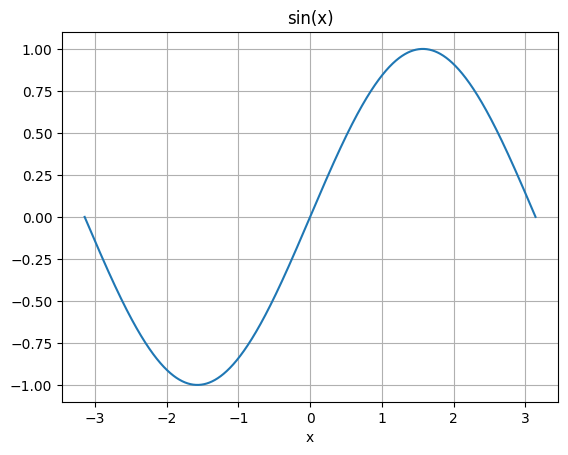

In [ ]:
plt.plot(x,y)
plt.title('sin(x)')
plt.xlabel("x")
plt.grid()
plt.show()


In [ ]:
#Randomly initialize weights
a=np.random.randn()
b=np.random.randn()
c=np.random.randn()
d=np.random.randn()
print(f'Initial: y = {a} + {b} x + {c} x^2 + {d} x^3')


Initial: y = -0.2506943939057439 + -0.6634477271356175 x + -0.5528317069783758 x^2 + 0.809219266071905 x^3


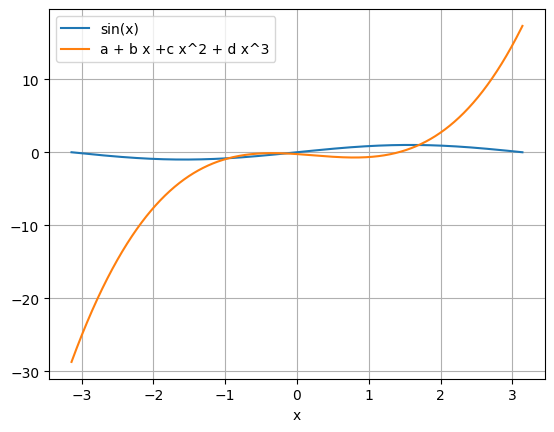

In [ ]:
y_pred = a + b * x + c * x ** 2 + d * x ** 3
# plot
plt.plot(x,y, label='sin(x)')
plt.plot(x,y_pred, label='a + b x +c x^2 + d x^3')
plt.xlabel("x")
plt.grid()
plt.legend()
plt.show()

counter: 99, SSE loss: 8.817165410007586
counter: 199, SSE loss: 8.817165410007416
counter: 299, SSE loss: 8.817165410007298
counter: 399, SSE loss: 8.817165410007217
counter: 499, SSE loss: 8.817165410007158
counter: 599, SSE loss: 8.817165410007117
counter: 699, SSE loss: 8.81716541000709
counter: 799, SSE loss: 8.817165410007073
counter: 899, SSE loss: 8.817165410007059
counter: 999, SSE loss: 8.817165410007048
Result: y = -4.672697262397661e-09 + 0.8567408413883564 x + 8.061180357301939e-10 x^2 + -0.09333038880086139 x^3


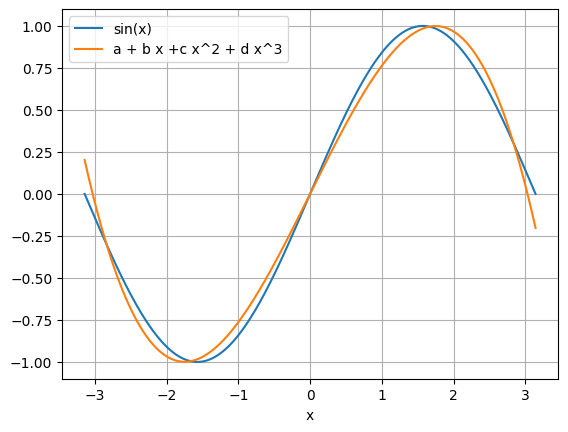

In [ ]:
learning_rate = 1e-6
for t in range(1000): # from 0 to n-1
    # Forward pass:compute predicted y
    # y = a + b x +c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    # Compute and print loss
    # loss is sum of squared error (SSE)

    loss = np.square(y_pred - y).sum()
    
    if t % 100 == 99 :
       print (f'counter: {t}, SSE loss: {loss}')

    # Backprop to compute gradients of loss with respect to a, b, c, d
    grad_y_pred= 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum() 

    # Update weights

    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d 

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')
# plot
plt.plot(x,y, label='sin(x)')
plt.plot(x,y_pred, label='a + b x +c x^2 + d x^3')
plt.xlabel("x")
plt.grid()
plt.legend()
plt.show()


# Torch for fitting a 3th polynomial to sin

In [ ]:
import torch
import math

In [ ]:
dtype=torch.float
device=torch.device('cpu')
#device=torch.device('cuda:0') I do not have GPU

In [ ]:
# creat random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

In [ ]:

#Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

In [ ]:
learning_rate = 1e-6
for t in range(1):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

learning_rate = 1e-6
for t in range(2000):
  # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 +d * x ** 3

  # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()

    if t % 100 == 99 :
       print(t,loss)
# Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

# Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d
print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')




99 1343.4727783203125
199 902.400146484375
299 607.5131225585938
399 410.234619140625
499 278.16754150390625
599 189.69418334960938
699 130.3816680908203
799 90.5885009765625
899 63.869712829589844
999 45.9151725769043
1099 33.839630126953125
1199 25.710933685302734
1299 20.234289169311523
1399 16.540855407714844
1499 14.047667503356934
1599 12.363031387329102
1699 11.223594665527344
1799 10.45208740234375
1899 9.929143905639648
1999 9.574333190917969
Result: y = -0.019329924136400223 + 0.8367320895195007 x + 0.003334733657538891 x^2 + -0.09048432111740112 x^3


# Using Torch autograd

In [ ]:
import torch
import math

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)
# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)
learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    # unfolding loss.backward():
    # grad_y_pred = 2.0 * (y_pred - y)
    # grad_a = grad_y_pred.sum()
    # grad_b = (grad_y_pred * x).sum()
    # grad_c = (grad_y_pred * x ** 2).sum()
    # grad_d = (grad_y_pred * x ** 3).sum()
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 375.9066467285156
199 266.8441467285156
299 190.25921630859375
399 136.45384216308594
499 98.63633728027344
599 72.0450668334961
699 53.34050750732422
799 40.178688049316406
899 30.91400146484375
999 24.390405654907227
1099 19.795528411865234
1199 16.55821990966797
1299 14.276748657226562
1399 12.668498992919922
1499 11.534527778625488
1599 10.7347993850708
1699 10.17066478729248
1799 9.772649765014648
1899 9.491781234741211
1999 9.29354190826416
Result: y = -0.022748254239559174 + 0.8530389666557312 x + 0.003924451768398285 x^2 + -0.09280382096767426 x^3


# Costomized autograd for Legendre function

In [ ]:
import torch
import math
import matplotlib.pyplot as plt
#plotting function for two curves, initial and fitted
def plot2curves(x,y,y_label,y_pred,y_pred_label):
     with torch.no_grad():
        plt.plot(x,y, label=y_label)
        plt.plot(x,y_pred, label=y_pred_label)
        plt.xlabel('x')
        plt.grid()
        plt.legend()
        plt.show()

class LegendrePolynomial3(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """
    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * input ** 2 - 1)


In [ ]:
dtype = torch.float
device = torch.device('cpu')

In [ ]:
x=torch.linspace(-math.pi,+math.pi,2000,device=device,dtype=dtype)
y=torch.sin(x)

In [ ]:
# Create random Tensors for weights. For this example, we need
# 4 weights: y = a + b * P3(c + d * x), these weights need to be initialized
# not too far from the correct result to ensure convergence.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a=torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b=torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c=torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d=torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

learning_rate=5e-6
for t in range(2000):
  # To apply our Function, we use Function.apply method. We alias this as 'P3'.
    P3 = LegendrePolynomial3.apply
    # Forward pass: compute predicted y using operations; we compute
    # P3 using our custom autograd operation.
    y_pred = a + b * P3(c + d * x)
    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass.
    loss.backward()
    # Update weights using gradient descent
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')


99 209.95834350585938
199 144.66018676757812
299 100.70249938964844
399 71.03519439697266
499 50.978511810302734
599 37.403133392333984
699 28.206867218017578
799 21.97318458557129
899 17.7457275390625
999 14.877889633178711
1099 12.93176555633545
1199 11.610918045043945
1299 10.71425724029541
1399 10.10548210144043
1499 9.692105293273926
1599 9.411375999450684
1699 9.220745086669922
1799 9.091285705566406
1899 9.003361701965332
1999 8.943641662597656
Result: y = -6.71270206087371e-10 + -2.208526849746704 * P3(-3.392665037793563e-10 + 0.2554861009120941 x)


In [ ]:
print(loss.item())

8.943641662597656


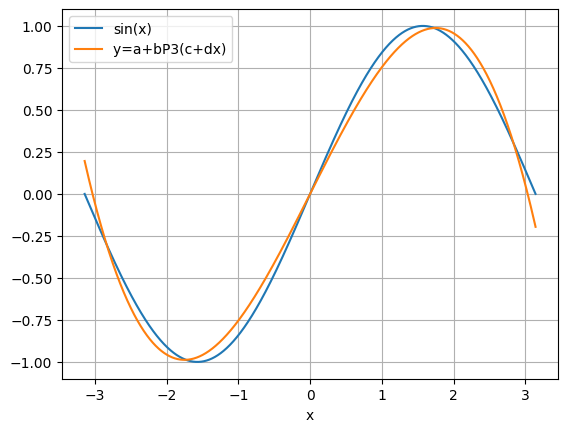

In [ ]:
plot2curves(x,y,'sin(x)',y_pred,'y=a+bP3​(c+dx)')

In [ ]:
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

In [ ]:
# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

#In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')
earning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()
    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
            # You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')


99 inf
199 nan
299 nan
399 nan
499 nan
599 nan
699 nan
799 nan
899 nan
999 nan
1099 nan
1199 nan
1299 nan
1399 nan
1499 nan
1599 nan
1699 nan
1799 nan
1899 nan
1999 nan
Result: y = nan + nan x + nan x^2 + nan x^3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')